# A Comprehensive Data Science Flow on House prediction dataset

Juan Sebastián Rojas Rodríguez 

## Abstract

## Functions

In [85]:
def scatterPlot(data, x_data, y_data, title, coef_position, x_size=6, y_size=5):
    """
    - df: Data Frame containing x_data and y_data as features.
    - x_data, y_data: Columns names (strings) to compare 
    - title is a string.
    - x_size and y_size: frame  dimentions (size).
    """
    
    pearson_coef, p_value = stats.pearsonr(data[x_data], data[y_data])
    
    fig, ax = plt.subplots(1, 1, figsize=(x_size, y_size))

    sns.scatterplot(data=data, x=x_data, y=y_data)
    
    sns.despine(top = True, right = True, left = False, bottom = False)

    fig.text(0.1, 1, title, fontweight='bold', 
             fontfamily='serif', fontsize=15)  
    
    ax.annotate(f"Pearson Coeficient : {pearson_coef :.2} \n P-value : {p_value}", 
            xy=(coef_position[0], coef_position[1]),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='white', linewidth=0)
               )
    
    ax.grid(visible=True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [13]:
def featureDistribution(df, col):
    skewness = np.round(df[col].skew(), 3)
    kurtosis = np.round(df[col].kurtosis(), 3)

    fig, axes = plt.subplots(1, 2, figsize = (20, 6))

    # sns.kdeplot(data = df, x = "Price", fill = True, ax = axes[0], color = "#603F83", linewidth = 2)
    sns.histplot(data=df, x=col, color="#603F83", fill = True, kde=True, ax = axes[0], linewidth = 0.08)
    sns.boxplot(data = df, y = col, ax = axes[1], color = "#603F83",linewidth = 2, flierprops = dict(marker = "x", markersize = 3.5))

    axes[0].set_title("Distribution \nSkewness: " + str(skewness) + "\nKurtosis: " + str(kurtosis))
    axes[1].set_title("Boxplot")
    fig.suptitle("For Feature:  " + "Price")

    for ax in axes:
        ax.set_facecolor("#C7D3D4FF")
        ax.grid(linewidth = 0.8)



    sns.despine(top = True, right = True, left = True, bottom = True)
    plt.show()


## Introduction

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
sns.set_style('white')

from scipy import stats 

from sklearn.model_selection import train_test_split # to split the data between training and test sets 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
featuresDescription = """id	A notation for a house
date	Date house was sold
price	Price is prediction target
bedrooms	Number of bedrooms
bathrooms	Number of bathrooms
sqft_living	Square footage of the home
sqft_lot	Square footage of the lot
floors	Total floors (levels) in house
waterfront	House which has a view to a waterfront
view	Has been viewed
condition	How good the condition is overall
grade	overall grade given to the housing unit, based on King County grading system
sqft_above	Square footage of house apart from basement
sqft_basement	Square footage of the basement
yr_built	Built Year
yr_renovated	Year when house was renovated
zipcode	Zip code
lat	Latitude coordinate
long	Longitude coordinate
sqft_living15	Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
sqft_lot15	LotSize area in 2015(implies-- some renovations)"""

In [3]:
import re

table = {'Feature':[] , 'Description':[]}
for index, item in enumerate(re.split("\t|\n", featuresDescription)):
    if index % 2 == 0:
        table['Feature'].append(item)
    else:
        table['Description'].append(item)

description = pd.DataFrame(table)
description

Feature                                        Description
0              id                             A notation for a house
1            date                                Date house was sold
2           price                         Price is prediction target
3        bedrooms                                 Number of bedrooms
4       bathrooms                                Number of bathrooms
5     sqft_living                         Square footage of the home
6        sqft_lot                          Square footage of the lot
7          floors                     Total floors (levels) in house
8      waterfront             House which has a view to a waterfront
9            view                                    Has been viewed
10      condition                  How good the condition is overall
11          grade  overall grade given to the housing unit, based...
12     sqft_above        Square footage of house apart from basement
13  sqft_basement                     Square footage of the basement
14       yr_built                                         Built Year
15   yr_renovated                      Year when house was renovated
16        zipcode                                           Zip code
17            lat                                Latitude coordinate
18           long                               Longitude coordinate
19  sqft_living15  Living room area in 2015(implies-- some renova...
20     sqft_lot15   LotSize area in 2015(implies-- some renovations)

## Dataset Load and Preview

In [4]:
df = pd.read_csv("kc_house_data.csv")
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
print("DataFrame df have {} rows and {} features.".format(df.shape[0], df.shape[1]))

DataFrame df have 21613 rows and 21 features.


There is a total of 21 features per property and we have 21613 properties samples.

## Data Cleaning

### Renaming the features

Some Feature names are not really interpretable well. Then, I am going to rename here the ones that are difficult to identify. This will make working with dataset a lot of easier. The Features that are going to be renamed are as follows:

    - date: SoldDate
    - id: Id
    - waterfront: WaterfrontSight
    - price: Price
    - view: View
    - grade: Grade
    - bedrooms: #Bedrooms
    - bathrooms: #Bathrooms
    - sqft_living: SqFtHome
    - condition: Condition
    - sqft_lot: SqFtLot
    - yr_built: BuiltYear
    - floors: #Floors
    - yr_renovated: RenovatedYear
    - lat: Latitude
    - long: Longitud

In [6]:
columns = {'date': 'SoldDate',
           'id':'Id',
           'waterfront':'WaterfrontSight',
           'price':'Price',
           'view':'View',
           'grade':'Grade',
           'condition':'Condition',
           'bedrooms':'#Bedrooms',
           'bathrooms':'#Bathrooms',
           'sqft_living':'SqFtHome',
           'sqft_lot':'SqFtLot',
           'yr_built':'BuiltYear',
           'floors':'#Floors',
           'yr_renovated':'RenovatedYear',
           'lat':'Latitude',
           'long':'Longitud',
           'zipcode':'ZipCode',
           'sqft_living15':'SqFtHome(2015)',
           'sqft_lot15':'SqFtLot(2015)',
           'sqft_above':'SqFtNoBasement',
           'sqft_basement':'SqFtBasement'}
df = df.rename(columns=columns)
df.head()

Id         SoldDate     Price  #Bedrooms  #Bathrooms  SqFtHome  \
0  7129300520  20141013T000000  221900.0          3        1.00      1180   
1  6414100192  20141209T000000  538000.0          3        2.25      2570   
2  5631500400  20150225T000000  180000.0          2        1.00       770   
3  2487200875  20141209T000000  604000.0          4        3.00      1960   
4  1954400510  20150218T000000  510000.0          3        2.00      1680   

   SqFtLot  #Floors  WaterfrontSight  View  ...  Grade  SqFtNoBasement  \
0     5650      1.0                0     0  ...      7            1180   
1     7242      2.0                0     0  ...      7            2170   
2    10000      1.0                0     0  ...      6             770   
3     5000      1.0                0     0  ...      7            1050   
4     8080      1.0                0     0  ...      8            1680   

   SqFtBasement  BuiltYear  RenovatedYear  ZipCode  Latitude  Longitud  \
0             0       1955              0    98178   47.5112  -122.257   
1           400       1951           1991    98125   47.7210  -122.319   
2             0       1933              0    98028   47.7379  -122.233   
3           910       1965              0    98136   47.5208  -122.393   
4             0       1987              0    98074   47.6168  -122.045   

   SqFtHome(2015)  SqFtLot(2015)  
0            1340           5650  
1            1690           7639  
2            2720           8062  
3            1360           5000  
4            1800           7503  

[5 rows x 21 columns]

### DateTime format

As we notice before, SoldDate feauture has an object ("string") datatype. If  we want to have some insights from it , we should transformd its typpe to datetime. In this way we can extract info like year, month and day separetly.

In [7]:
df['SoldDate']

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: SoldDate, Length: 21613, dtype: object

In [8]:
df['SoldDate'] = pd.to_datetime(df['SoldDate'])
df['SoldDate']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: SoldDate, Length: 21613, dtype: datetime64[ns]

### Datatype

Let's see the type of data we are dealing with:

In [9]:
# updating columns names
dtypes = df.dtypes
new_index = dtypes.index.to_list()
description['index'] = new_index
description = description.drop("Feature", axis=1)

# change the series to dataframe format
dtypes = dtypes.to_frame()

# palce the new index (new columns names)
description = description.rename(columns={'index':'Feature'})
description = description.set_index('Feature')

# merging the to dataframes
description = pd.merge(description, dtypes, how="outer", right_index=True, left_index=True)

description = description.rename(columns={0:'Dtype'})

description

Description  \
Id                                          A notation for a house   
SoldDate                                       Date house was sold   
Price                                   Price is prediction target   
#Bedrooms                                       Number of bedrooms   
#Bathrooms                                     Number of bathrooms   
SqFtHome                                Square footage of the home   
SqFtLot                                  Square footage of the lot   
#Floors                             Total floors (levels) in house   
WaterfrontSight             House which has a view to a waterfront   
View                                               Has been viewed   
Condition                        How good the condition is overall   
Grade            overall grade given to the housing unit, based...   
SqFtNoBasement         Square footage of house apart from basement   
SqFtBasement                        Square footage of the basement   
BuiltYear                                               Built Year   
RenovatedYear                        Year when house was renovated   
ZipCode                                                   Zip code   
Latitude                                       Latitude coordinate   
Longitud                                      Longitude coordinate   
SqFtHome(2015)   Living room area in 2015(implies-- some renova...   
SqFtLot(2015)     LotSize area in 2015(implies-- some renovations)   

                          Dtype  
Id                        int64  
SoldDate         datetime64[ns]  
Price                   float64  
#Bedrooms                 int64  
#Bathrooms              float64  
SqFtHome                  int64  
SqFtLot                   int64  
#Floors                 float64  
WaterfrontSight           int64  
View                      int64  
Condition                 int64  
Grade                     int64  
SqFtNoBasement            int64  
SqFtBasement              int64  
BuiltYear                 int64  
RenovatedYear             int64  
ZipCode                   int64  
Latitude                float64  
Longitud                float64  
SqFtHome(2015)            int64  
SqFtLot(2015)             int64

### Missing Values

Let's find out the amount of data that is Nan in our dataset and then merged this new info into the description frame.

In [10]:
null_values = df.isnull().sum().to_frame()
null_values = null_values.rename(columns={0:'Null_Values'})

In [11]:
description = pd.merge(description, null_values, how='outer', left_index=True, right_index=True)
description

Description  \
Id                                          A notation for a house   
SoldDate                                       Date house was sold   
Price                                   Price is prediction target   
#Bedrooms                                       Number of bedrooms   
#Bathrooms                                     Number of bathrooms   
SqFtHome                                Square footage of the home   
SqFtLot                                  Square footage of the lot   
#Floors                             Total floors (levels) in house   
WaterfrontSight             House which has a view to a waterfront   
View                                               Has been viewed   
Condition                        How good the condition is overall   
Grade            overall grade given to the housing unit, based...   
SqFtNoBasement         Square footage of house apart from basement   
SqFtBasement                        Square footage of the basement   
BuiltYear                                               Built Year   
RenovatedYear                        Year when house was renovated   
ZipCode                                                   Zip code   
Latitude                                       Latitude coordinate   
Longitud                                      Longitude coordinate   
SqFtHome(2015)   Living room area in 2015(implies-- some renova...   
SqFtLot(2015)     LotSize area in 2015(implies-- some renovations)   

                          Dtype  Null_Values  
Id                        int64            0  
SoldDate         datetime64[ns]            0  
Price                   float64            0  
#Bedrooms                 int64            0  
#Bathrooms              float64            0  
SqFtHome                  int64            0  
SqFtLot                   int64            0  
#Floors                 float64            0  
WaterfrontSight           int64            0  
View                      int64            0  
Condition                 int64            0  
Grade                     int64            0  
SqFtNoBasement            int64            0  
SqFtBasement              int64            0  
BuiltYear                 int64            0  
RenovatedYear             int64            0  
ZipCode                   int64            0  
Latitude                float64            0  
Longitud                float64            0  
SqFtHome(2015)            int64            0  
SqFtLot(2015)             int64            0

As we can see in the column Null_Values, there is not missing values in this dataset.

## Exploratory Data Aanalysis

In [12]:
df.describe()

Id         Price     #Bedrooms    #Bathrooms      SqFtHome  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

            SqFtLot       #Floors  WaterfrontSight          View  \
count  2.161300e+04  21613.000000     21613.000000  21613.000000   
mean   1.510697e+04      1.494309         0.007542      0.234303   
std    4.142051e+04      0.539989         0.086517      0.766318   
min    5.200000e+02      1.000000         0.000000      0.000000   
25%    5.040000e+03      1.000000         0.000000      0.000000   
50%    7.618000e+03      1.500000         0.000000      0.000000   
75%    1.068800e+04      2.000000         0.000000      0.000000   
max    1.651359e+06      3.500000         1.000000      4.000000   

          Condition         Grade  SqFtNoBasement  SqFtBasement     BuiltYear  \
count  21613.000000  21613.000000    21613.000000  21613.000000  21613.000000   
mean       3.409430      7.656873     1788.390691    291.509045   1971.005136   
std        0.650743      1.175459      828.090978    442.575043     29.373411   
min        1.000000      1.000000      290.000000      0.000000   1900.000000   
25%        3.000000      7.000000     1190.000000      0.000000   1951.000000   
50%        3.000000      7.000000     1560.000000      0.000000   1975.000000   
75%        4.000000      8.000000     2210.000000    560.000000   1997.000000   
max        5.000000     13.000000     9410.000000   4820.000000   2015.000000   

       RenovatedYear       ZipCode      Latitude      Longitud  \
count   21613.000000  21613.000000  21613.000000  21613.000000   
mean       84.402258  98077.939805     47.560053   -122.213896   
std       401.679240     53.505026      0.138564      0.140828   
min         0.000000  98001.000000     47.155900   -122.519000   
25%         0.000000  98033.000000     47.471000   -122.328000   
50%         0.000000  98065.000000     47.571800   -122.230000   
75%         0.000000  98118.000000     47.678000   -122.125000   
max      2015.000000  98199.000000     47.777600   -121.315000   

       SqFtHome(2015)  SqFtLot(2015)  
count    21613.000000   21613.000000  
mean      1986.552492   12768.455652  
std        685.391304   27304.179631  
min        399.000000     651.000000  
25%       1490.000000    5100.000000  
50%       1840.000000    7620.000000  
75%       2360.000000   10083.000000  
max       6210.000000  871200.000000

To get a better understanding for the data let's have a look at the distribution of the outcome (price).

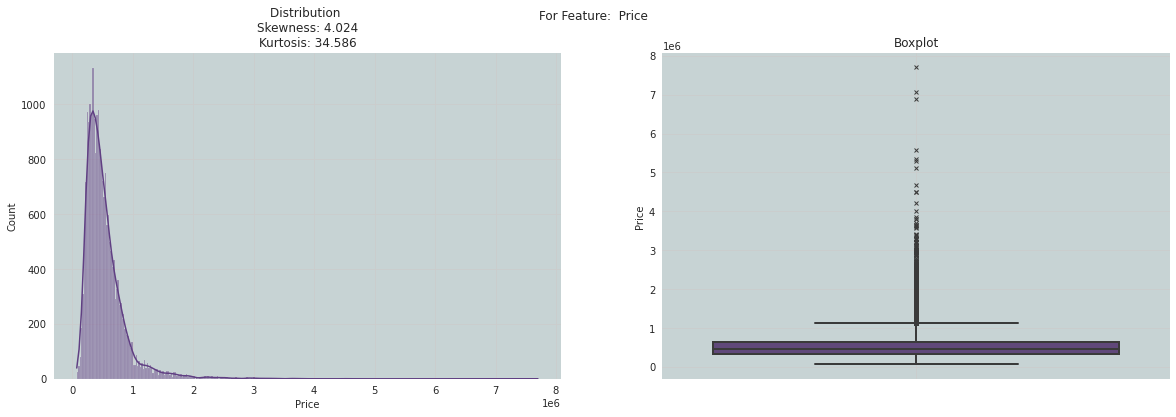

In [14]:
featureDistribution(df, "Price")

Skewed right distribution. In fact, as we see before the price mean is 540088.14, the median is 450000.00 and the mode is 350000.00. Then, mode > median > mean, which clearly describes a positive skewed distribution.

In [15]:
print("The mode is: {}".format(df["Price"].mode()[0]))
print("The median is: {}".format(df["Price"].median()))
print("The mean is: {}".format(np.round(df["Price"].mean()), 5))

The mode is: 350000.0
The median is: 450000.0
The mean is: 540088.0


### Dates

In [16]:
df["SoldDate"].dt.year.unique()

array([2014, 2015])

This dataset comprends a period of two years between 2014 and 2015. 

In [31]:
sold2014 = df[df['SoldDate'].dt.year == 2014]
sold2015 = df[df['SoldDate'].dt.year == 2015]

month2014 = sold2014['SoldDate'].dt.month.value_counts()
month2015 = sold2015['SoldDate'].dt.month.value_counts()

sells_per_month = pd.merge(month2014.to_frame().reset_index(), month2015.to_frame().reset_index(), how='outer')
sells_per_month = sells_per_month.rename(columns={"index":"Month", "SoldDate":"SellsPerMonth"})

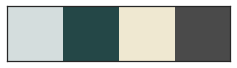

In [32]:
sns.palplot(['#d4dddd', '#244747', '#efe8d1', '#4a4a4a'])

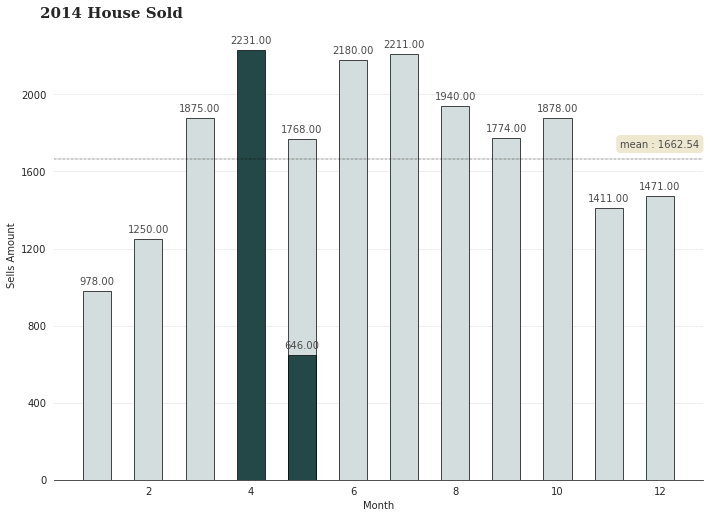

In [18]:
# sns.palplot(['#d4dddd', '#244747', '#efe8d1', '#4a4a4a'])

fig, ax = plt.subplots(1, 1, figsize=(10, 7))

color_map = ['#d4dddd' for _ in range(len(sells_per_month["Month"]))]
color_map[12] = color_map[8] = '#244747' # color highlight


# this block generates the bar plot
ax.bar(sells_per_month["Month"], sells_per_month["SellsPerMonth"], 
       color=color_map, width=0.55, 
       edgecolor='black', 
       linewidth=0.7)

grid_y_ticks = np.arange(0, sells_per_month["SellsPerMonth"].max(), 400)
ax.set_yticks(grid_y_ticks)
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Annotation Part
for index, item in enumerate(sells_per_month["Month"]):
    ax.annotate(f"{sells_per_month['SellsPerMonth'][index]:.02f}", 
                   xy=(item, sells_per_month["SellsPerMonth"][index] + 50),
                   va = 'center', ha='center',fontweight='light', 
                   color='#4a4a4a')

# mean line + annotation
mean = sells_per_month["SellsPerMonth"].mean()
ax.axhline(mean, color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.6}", 
            xy=(12, mean + 80),
            va = 'center', ha='center',
            color='#4a4a4a',
            bbox=dict(boxstyle='round', pad=0.4, facecolor='#efe8d1', linewidth=0))


# This gets rid of the side lines that boundaires the plot
for s in ["top","right","left"]:
    ax.spines[s].set_visible(False)
    
# Title 
fig.text(0.06, 1, '2014 House Sold', fontsize=15, fontweight='bold', fontfamily='serif')
plt.xlabel('Month') 
plt.ylabel('Sells Amount')
    

    
plt.tight_layout()
plt.show()

This shows the reach of the data we have. It is not a 24 months report.It is close to a period of a year between May/2014 and May/2015. The amount of sells diminsh almost a third respect the sells in the same month (May).


Let's see how the sell price change over the months

### Correlation

In [19]:
corr = df.corr()
corr

Id     Price  #Bedrooms  #Bathrooms  SqFtHome  \
Id               1.000000 -0.016762   0.001286    0.005160 -0.012258   
Price           -0.016762  1.000000   0.308350    0.525138  0.702035   
#Bedrooms        0.001286  0.308350   1.000000    0.515884  0.576671   
#Bathrooms       0.005160  0.525138   0.515884    1.000000  0.754665   
SqFtHome        -0.012258  0.702035   0.576671    0.754665  1.000000   
SqFtLot         -0.132109  0.089661   0.031703    0.087740  0.172826   
#Floors          0.018525  0.256794   0.175429    0.500653  0.353949   
WaterfrontSight -0.002721  0.266369  -0.006582    0.063744  0.103818   
View             0.011592  0.397293   0.079532    0.187737  0.284611   
Condition       -0.023783  0.036362   0.028472   -0.124982 -0.058753   
Grade            0.008130  0.667434   0.356967    0.664983  0.762704   
SqFtNoBasement  -0.010842  0.605567   0.477600    0.685342  0.876597   
SqFtBasement    -0.005151  0.323816   0.303093    0.283770  0.435043   
BuiltYear        0.021380  0.054012   0.154178    0.506019  0.318049   
RenovatedYear   -0.016907  0.126434   0.018841    0.050739  0.055363   
ZipCode         -0.008224 -0.053203  -0.152668   -0.203866 -0.199430   
Latitude        -0.001891  0.307003  -0.008931    0.024573  0.052529   
Longitud         0.020799  0.021626   0.129473    0.223042  0.240223   
SqFtHome(2015)  -0.002901  0.585379   0.391638    0.568634  0.756420   
SqFtLot(2015)   -0.138798  0.082447   0.029244    0.087175  0.183286   

                  SqFtLot   #Floors  WaterfrontSight      View  Condition  \
Id              -0.132109  0.018525        -0.002721  0.011592  -0.023783   
Price            0.089661  0.256794         0.266369  0.397293   0.036362   
#Bedrooms        0.031703  0.175429        -0.006582  0.079532   0.028472   
#Bathrooms       0.087740  0.500653         0.063744  0.187737  -0.124982   
SqFtHome         0.172826  0.353949         0.103818  0.284611  -0.058753   
SqFtLot          1.000000 -0.005201         0.021604  0.074710  -0.008958   
#Floors         -0.005201  1.000000         0.023698  0.029444  -0.263768   
WaterfrontSight  0.021604  0.023698         1.000000  0.401857   0.016653   
View             0.074710  0.029444         0.401857  1.000000   0.045990   
Condition       -0.008958 -0.263768         0.016653  0.045990   1.000000   
Grade            0.113621  0.458183         0.082775  0.251321  -0.144674   
SqFtNoBasement   0.183512  0.523885         0.072075  0.167649  -0.158214   
SqFtBasement     0.015286 -0.245705         0.080588  0.276947   0.174105   
BuiltYear        0.053080  0.489319        -0.026161 -0.053440  -0.361417   
RenovatedYear    0.007644  0.006338         0.092885  0.103917  -0.060618   
ZipCode         -0.129574 -0.059121         0.030285  0.084827   0.003026   
Latitude        -0.085683  0.049614        -0.014274  0.006157  -0.014941   
Longitud         0.229521  0.125419        -0.041910 -0.078400  -0.106500   
SqFtHome(2015)   0.144608  0.279885         0.086463  0.280439  -0.092824   
SqFtLot(2015)    0.718557 -0.011269         0.030703  0.072575  -0.003406   

                    Grade  SqFtNoBasement  SqFtBasement  BuiltYear  \
Id               0.008130       -0.010842     -0.005151   0.021380   
Price            0.667434        0.605567      0.323816   0.054012   
#Bedrooms        0.356967        0.477600      0.303093   0.154178   
#Bathrooms       0.664983        0.685342      0.283770   0.506019   
SqFtHome         0.762704        0.876597      0.435043   0.318049   
SqFtLot          0.113621        0.183512      0.015286   0.053080   
#Floors          0.458183        0.523885     -0.245705   0.489319   
WaterfrontSight  0.082775        0.072075      0.080588  -0.026161   
View             0.251321        0.167649      0.276947  -0.053440   
Condition       -0.144674       -0.158214      0.174105  -0.361417   
Grade            1.000000        0.755923      0.168392   0.446963   
SqFtNoBasement   0.755923        1.000000     -0.051

In [20]:
corr = df.corr()

sns.set_theme(style="white")
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# mask = np.zeros_like(corr, dtype=np.bool_)
# mask[np.triu_indices_from(mask)] = True

mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Adjust mask to show diagonal elements as well
for i in range(mask.shape[0]):
    mask[i][i] = False


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,
            annot=True, fmt=".2f",
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, # cbar_kws={"shrink": .5},  # to diminish cbar size
            ax=ax)

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_yticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1, 'Correlation Heatmap Visualization', fontweight='bold', fontfamily='serif',
         fontsize=15, ha='right')    

plt.tight_layout()
plt.show()

How much the houses years since they were built affect the sold price?

In [21]:
df["HouseAge"] = df["SoldDate"].dt.year - df["BuiltYear"]
df[["Price", "HouseAge"]].corr()

Price  HouseAge
Price     1.000000 -0.053951
HouseAge -0.053951  1.000000

In [22]:
pearson_coef, p_value = stats.pearsonr(df["HouseAge"], df["Price"])
print("Pearson coeficient is {} and the P-value is {}".format(np.round(pearson_coef, 2), p_value))

Pearson coeficient is -0.05 and the P-value is 2.0743084025365884e-15


As we can see contrary to the common sense this has no much repercusion on house price. At least not by itself.

In [23]:
corr[np.abs(corr["Price"])>0.5]["Price"]

Price             1.000000
#Bathrooms        0.525138
SqFtHome          0.702035
Grade             0.667434
SqFtNoBasement    0.605567
SqFtHome(2015)    0.585379
Name: Price, dtype: float64

Variables with better correlation with price feature are :
- #Bathrooms        0.525138
- SqFtHome          0.702035
- Grade             0.667434
- SqFtNoBasement    0.605567
- SqFtHome(2015)    0.585379

In [75]:
scatterPlot(data=df, x_data="#Bathrooms", y_data="Price", 
            title="Correlation between #Bathrooms and Price", coef_position=[2, 7400000])

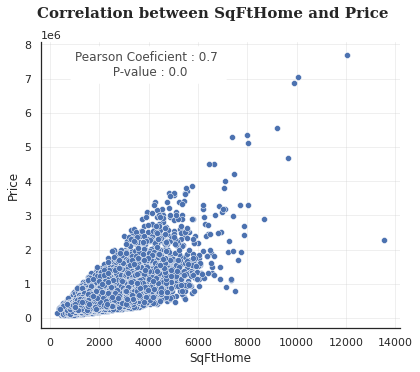

In [79]:
scatterPlot(data=df, x_data="SqFtHome", y_data="Price", 
            title="Correlation between SqFtHome and Price", coef_position=[4000, 7400000])

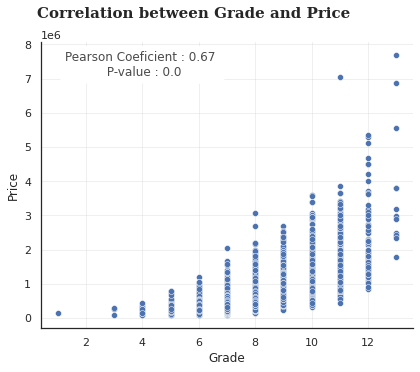

In [86]:
scatterPlot(data=df, x_data="Grade", y_data="Price", 
            title="Correlation between Grade and Price", coef_position=[4, 7400000])

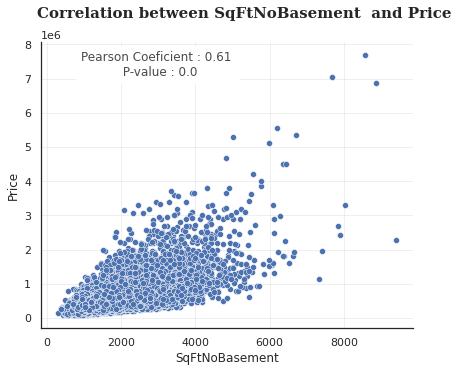

In [90]:
scatterPlot(data=df, x_data="SqFtNoBasement", y_data="Price", 
            title="Correlation between SqFtNoBasement  and Price", coef_position=[3000, 7400000])

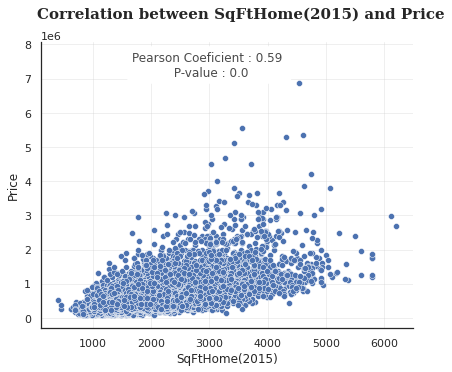

In [92]:
scatterPlot(data=df, x_data="SqFtHome(2015)", y_data="Price", 
            title="Correlation between SqFtHome(2015) and Price", coef_position=[3000, 7400000])

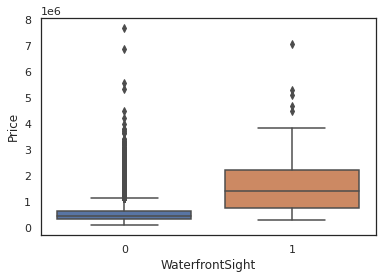

In [27]:
sns.boxplot(x=df["WaterfrontSight"], y=df["Price"], data=df)
plt.show()

In [28]:
sns.regplot(x="sqft_above", y="price", data=df)
plt.show()

KeyError: 'sqft_above'

In [ ]:
df.corr()["price"].sort_values()

In [ ]:
X1 = df[["sqft_living"]]
Y1 = df[["price"]]
lm1 = LinearRegression()
lm1.fit(X1, Y1)
lm1.score(X1, Y1)

### Multilinear Regresion

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
lm2 = LinearRegression()
lm2.fit(df[features], df["price"])
lm2.score(df[features], df["price"])